0
1.0
3
1.0000079595279037
6
1.000023257039513
9


OSError: ./Data/Kerr/Cdens0003_cavity_drive/0030.txt not found.

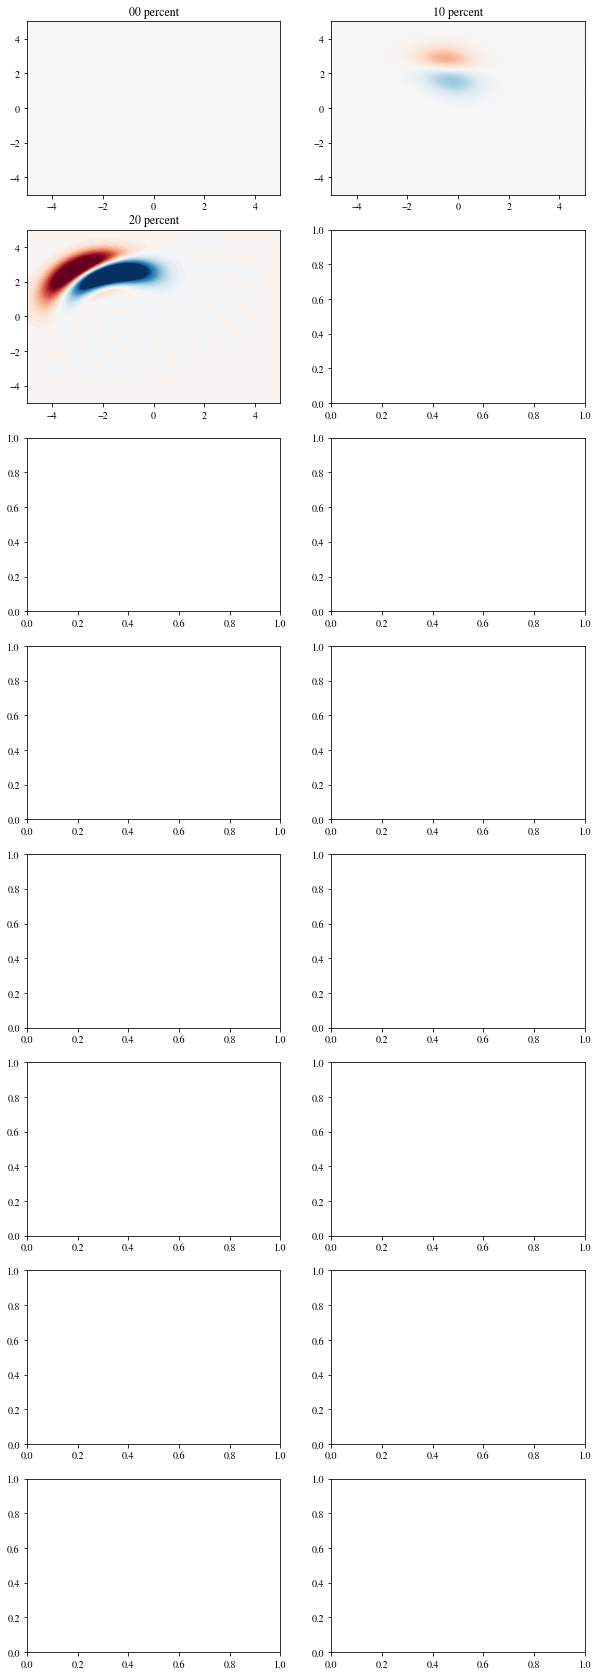

In [30]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(8, 2, figsize=(10,30))
for i in range(0,8):
    row = int((i)/2)
    col = (i)%2
    print(i*3)
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)

    array = np.loadtxt('./Data/Kerr/Cdens0001_cavity_drive/%04d.txt'%(i*10)).view(complex)
    array2 = np.loadtxt('./Data/Kerr/Cdens0002_cavity_drive/%04d.txt'%(i*10)).view(complex)
    array3 = np.loadtxt('./Data/Kerr/Cdens0003_cavity_drive/%04d.txt'%(i*10)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0141_coherent_cavity/%03d.txt'%(i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0005/%03d.txt'%(i)).view(complex)
    #print(array)
    print(Qobj(array).tr())
    correction = np.zeros((array.shape))
    correction[0][0] = 0#1
    W = wigner(Qobj(array), xvec, xvec)
    W2 = wigner(Qobj(array2), xvec, xvec)
    W3 = wigner(Qobj(array3), xvec, xvec)
    cont = axes[row][col].contourf(xvec, xvec, W-W3, 100,norm=mpl.colors.Normalize(-0.05,.05),cmap="RdBu")
    lbl = axes[row][col].set_title("%d0 percent"%i)
cbar = fig.colorbar(cont)
    

In [9]:
dt = 0.001
for M in range(1000):

    if M*dt<10.1 and ((M+1)*dt*10)%1==0:
        print((M+1)*dt)
    elif M*dt>10. and ((M+1)*dt)%10==0:
        print((M+1)*dt)


0.1
0.2
0.3
0.4
0.5
0.6
0.8
0.9
1.0


In [1]:
array = np.loadtxt('./Data/JC+fb/New/Cdens0020_coherent_environment/%03d.txt'%(1)).view(complex)
#array = np.loadtxt('./Data/JC+fb/New/Cdens0041_coherent_cavity/%03d.txt'%(1)).view(complex)
#array = np.loadtxt('./Data/JC+fb/New/Cdens0013_coherent_environment/%03d.txt'%(2)).view(complex)
dist = np.diag(np.real(array))
#n, bins, patches=plt.hist(dist,len(dist))
plt.figure(1,dpi=500,figsize=(10,1.5))
plt.grid(True)
plt.bar(np.arange(len(dist)),dist)
plt.yscale("log")

NameError: name 'np' is not defined

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


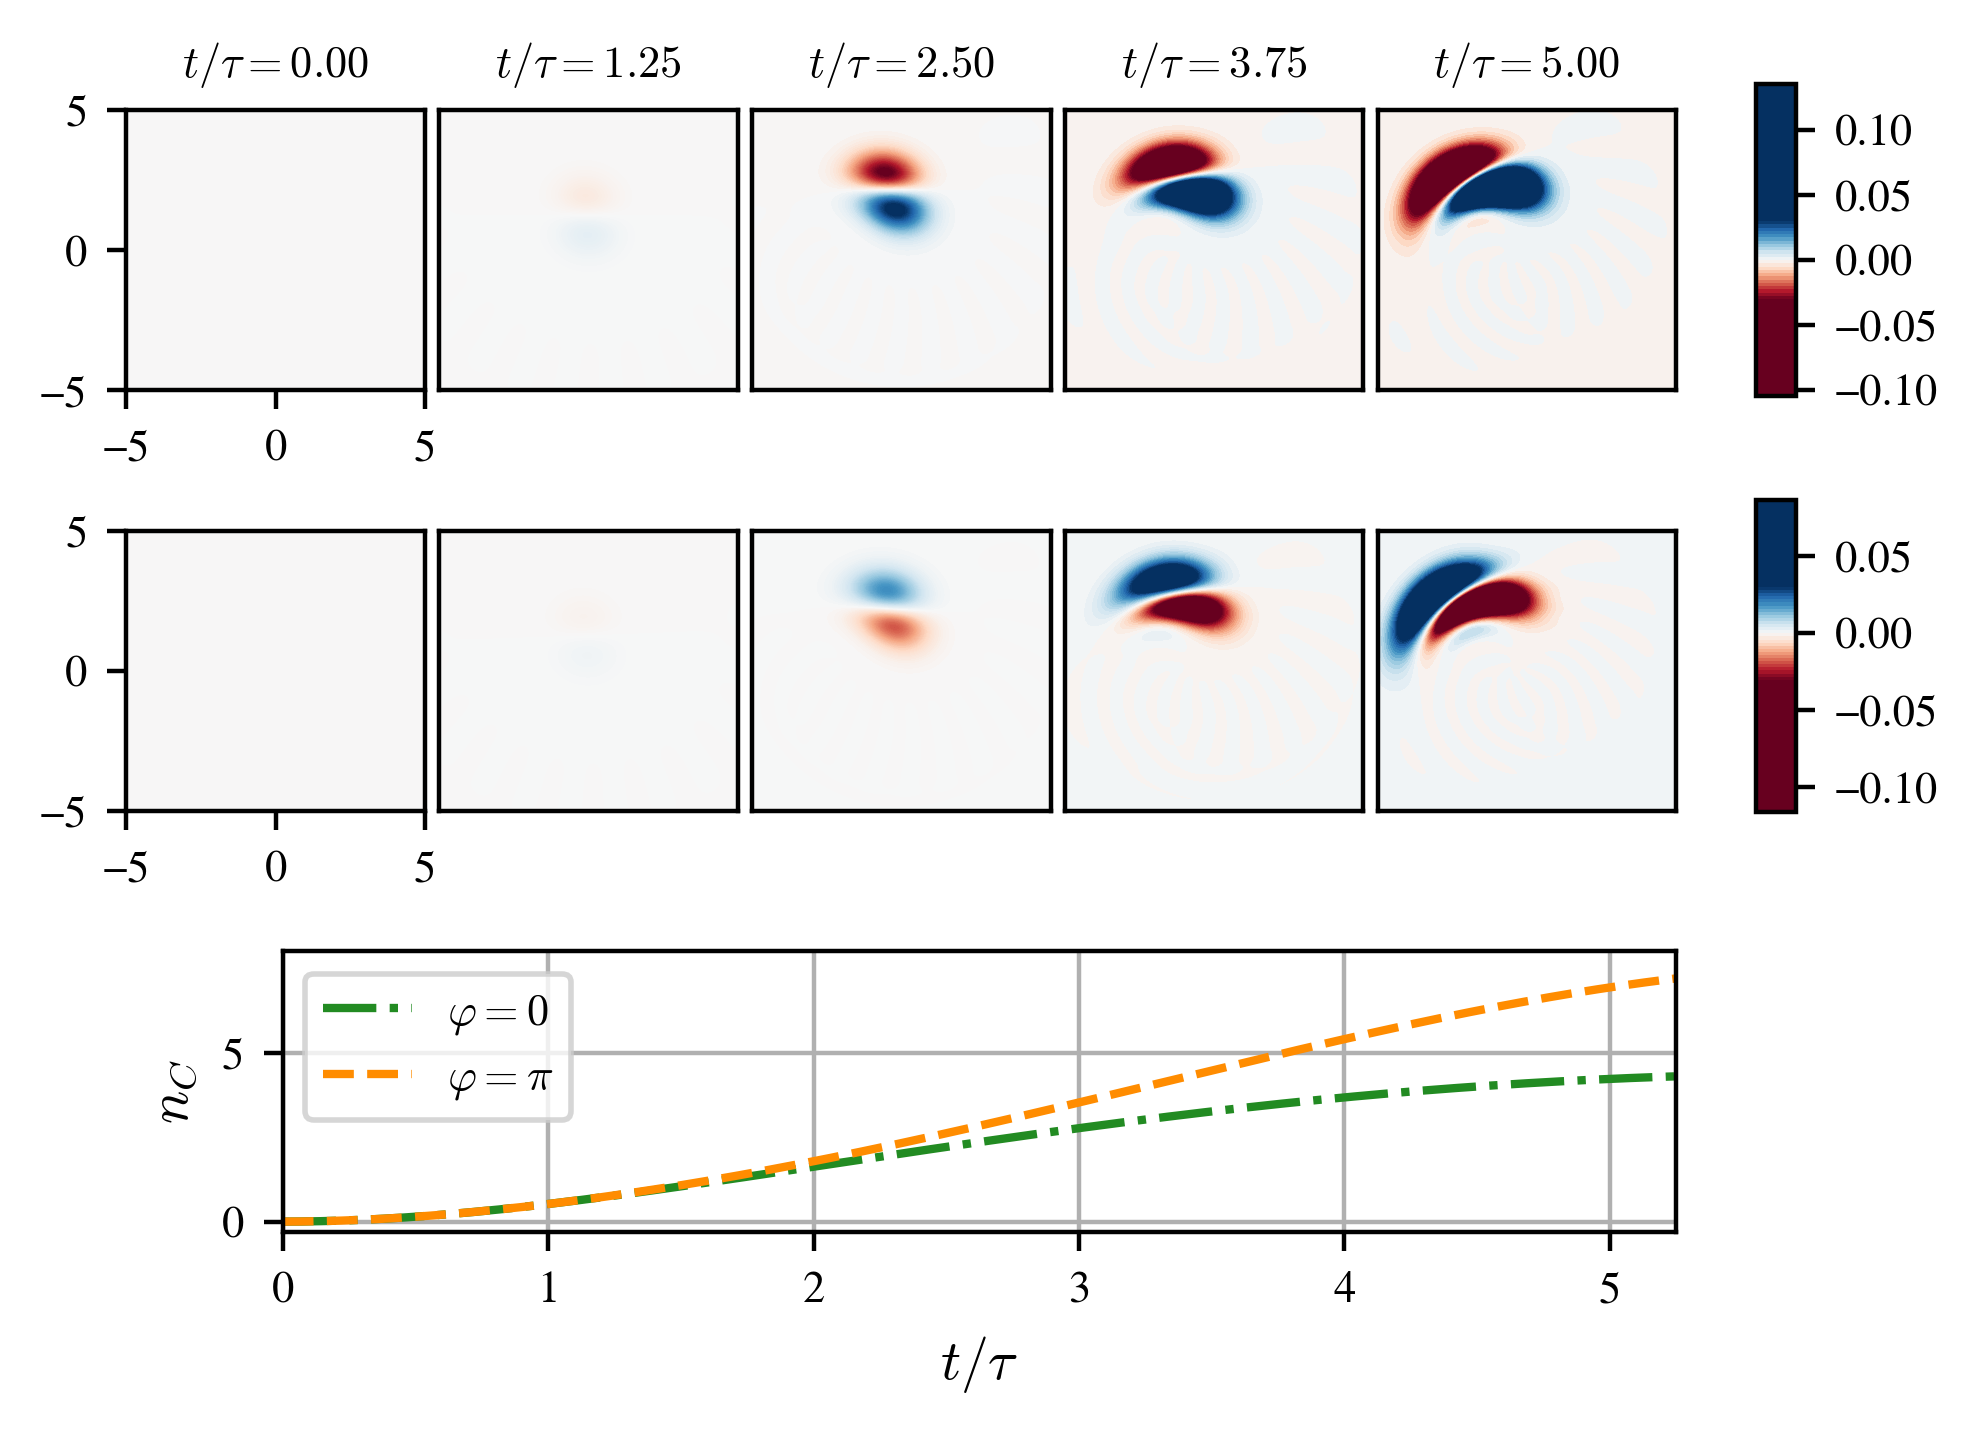

In [14]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()
mpl.rc('xtick',labelsize=8)
mpl.rc('ytick',labelsize=8)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')

xvec = np.linspace(-5,5,1000)
ID = 3
fig_grid = (5, 5*2)
fig = plt.figure(dpi=400,figsize=(5,6.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.1, hspace=0.5)
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,5):
#    row = int(i/5)
    col = i%5
#    print(row,col)
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
    array0 = np.loadtxt('./Data/Kerr/Cdens0001_cavity_drive/%04d.txt'%(i*5)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
    array = np.loadtxt('./Data/Kerr/Cdens%04d_cavity_drive/%04d.txt'%(ID-1,i*5)).view(complex)
    array2 = np.loadtxt('./Data/Kerr/Cdens%04d_cavity_drive/%04d.txt'%(ID,i*5)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    W = wigner(Qobj(array), xvec, xvec)
    W2 = wigner(Qobj(array2), xvec, xvec)
    W0 = wigner(Qobj(array0), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*col), colspan=2)
    ax2 = plt.subplot2grid(fig_grid, (1, 2*col), colspan=2)
    if col>0:
        ax.set_yticks([])
        ax.set_xticks([])
        ax2.set_yticks([])
        ax2.set_xticks([])
    cont=ax.contourf(xvec, xvec, W-W0, 100, norm=mpl.colors.Normalize(-.03,.03), cmap=plt.get_cmap('RdBu'))
    cont2=ax2.contourf(xvec, xvec, W2-W0, 100, norm=mpl.colors.Normalize(-.03,.03), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t/\tau = %.2f$" % (i*5/4), fontsize=8)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%(ID-1))),dtype=complex)
dat0 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol0001_cavity_drive.txt")),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%(ID))),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%10)),dtype=complex)
cax = fig.add_axes([0.94, 0.77, 0.02, 0.12])
cax2 = fig.add_axes([0.94, 0.61, 0.02, 0.12])

cbar = fig.colorbar(cont,cax=cax,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
cbar2 = fig.colorbar(cont2,cax=cax2,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
#cbar = fig.colorbar(cont,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
tlist = dat1[:,0]
tlist2 = dat2[:,0]
n_c = dat1[:,2]
n_c2 = dat2[:,2]
n_c0=dat0[:,2]
tlist0=dat0[:,0]
#n_a = dat1[:,2]

ax = plt.subplot2grid(fig_grid, (2, 1), colspan=(fig_grid[1]-1))
ax.plot(tlist/0.4, n_c, label="$\\varphi=0$",color="forestgreen",ls="-.")
ax.plot(tlist2/0.4, n_c2, label="$\\varphi=\pi$",ls="--",color="darkorange")
#ax.plot(tlist, n_a, label="Atom excited state")
ax.legend(loc="upper left",fontsize = 8)
ax.grid(True)
ax.set_xlim(0,2.1/.4)
ax.set_ylim(-.3,8)
ax.set_xlabel('$t/\\tau$')
ax.set_ylabel('$n_C$');
plt.savefig("./diff_Wigner_func.png")
plt.show()

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


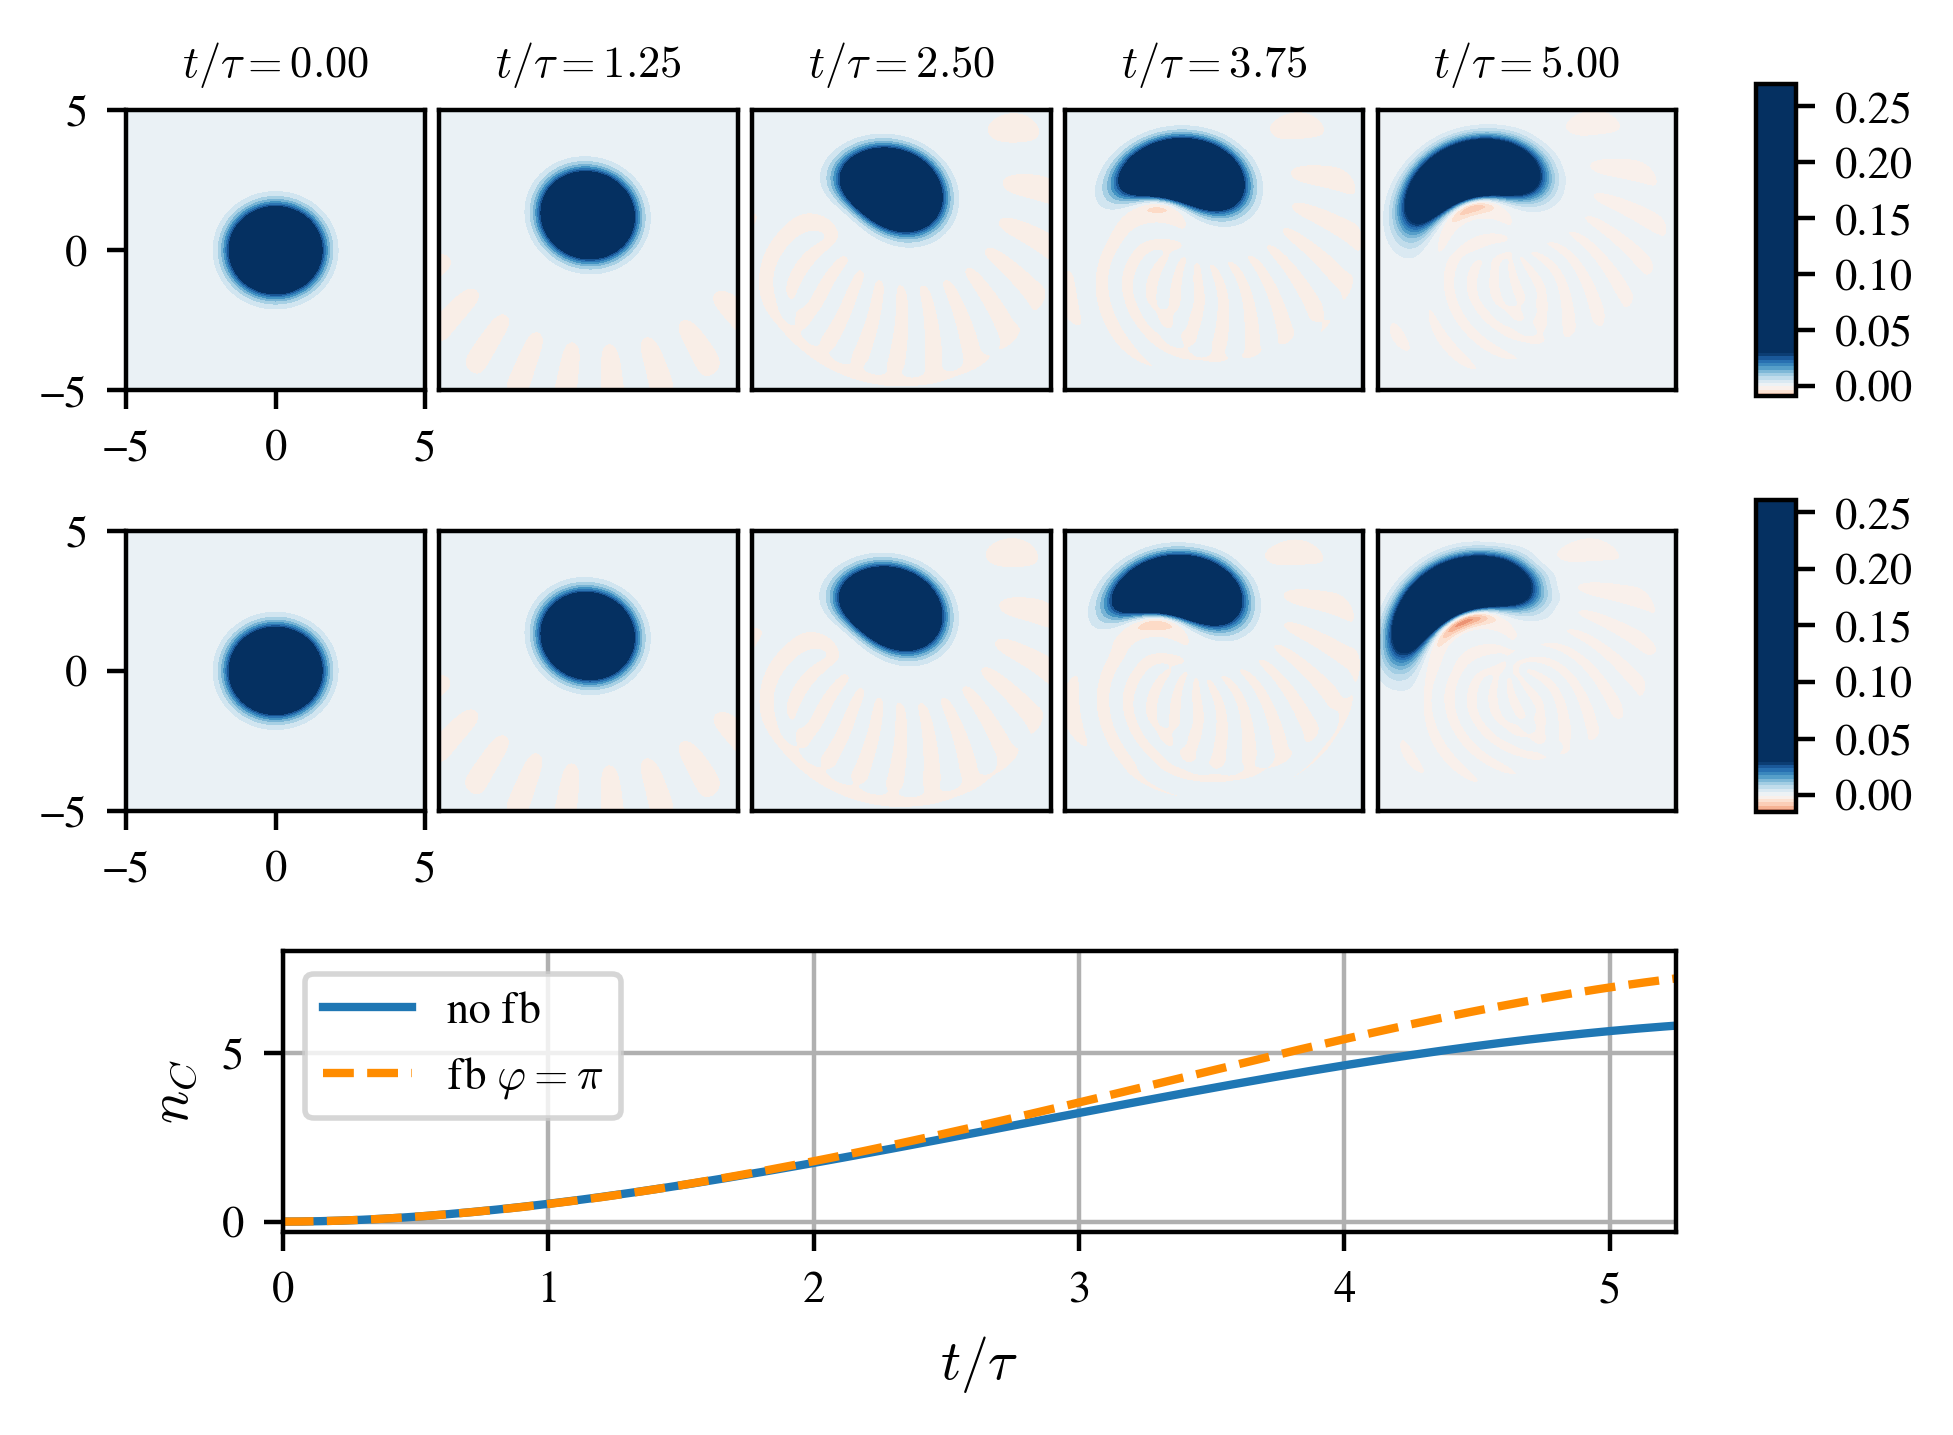

In [15]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()
mpl.rc('xtick',labelsize=8)
mpl.rc('ytick',labelsize=8)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')

xvec = np.linspace(-5,5,1000)
ID = 3
fig_grid = (5, 5*2)
fig = plt.figure(dpi=400,figsize=(5,6.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.1, hspace=0.5)
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,5):
#    row = int(i/5)
    col = i%5
#    print(row,col)
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
    array0 = np.loadtxt('./Data/Kerr/Cdens0001_cavity_drive/%04d.txt'%(i*5)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
    array = np.loadtxt('./Data/Kerr/Cdens%04d_cavity_drive/%04d.txt'%(ID-1,i*5)).view(complex)
    array2 = np.loadtxt('./Data/Kerr/Cdens%04d_cavity_drive/%04d.txt'%(ID,i*5)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    W = wigner(Qobj(array), xvec, xvec)
    W2 = wigner(Qobj(array2), xvec, xvec)
    W0 = wigner(Qobj(array0), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*col), colspan=2)
    ax2 = plt.subplot2grid(fig_grid, (1, 2*col), colspan=2)
    if col>0:
        ax.set_yticks([])
        ax.set_xticks([])
        ax2.set_yticks([])
        ax2.set_xticks([])
    cont=ax.contourf(xvec, xvec, W0, 100, norm=mpl.colors.Normalize(-.03,.03), cmap=plt.get_cmap('RdBu'))
    cont2=ax2.contourf(xvec, xvec, W2, 100, norm=mpl.colors.Normalize(-.03,.03), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t/\tau = %.2f$" % (i*5/4), fontsize=8)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat2 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%(ID-1))),dtype=complex)
dat0 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol0001_cavity_drive.txt")),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%(ID))),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%10)),dtype=complex)
cax = fig.add_axes([0.94, 0.77, 0.02, 0.12])
cax2 = fig.add_axes([0.94, 0.61, 0.02, 0.12])

cbar = fig.colorbar(cont,cax=cax,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
cbar2 = fig.colorbar(cont2,cax=cax2,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
#cbar = fig.colorbar(cont,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
tlist = dat1[:,0]
tlist2 = dat2[:,0]
n_c = dat1[:,2]
n_c2 = dat2[:,2]
n_c0=dat0[:,2]
tlist0=dat0[:,0]
#n_a = dat1[:,2]

ax = plt.subplot2grid(fig_grid, (2, 1), colspan=(fig_grid[1]-1))
ax.plot(tlist0/0.4, n_c0, label="no fb")
ax.plot(tlist2/0.4, n_c2, label="fb $\\varphi=\pi$",ls="--",color="darkorange")
#ax.plot(tlist, n_a, label="Atom excited state")
ax.legend(loc="upper left",fontsize = 8)
ax.grid(True)
ax.set_xlim(0,2.1/.4)
ax.set_ylim(-.3,8)
ax.set_xlabel('$t/\\tau$')
ax.set_ylabel('$n_C$');
plt.savefig("./Wigner_func.png")

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


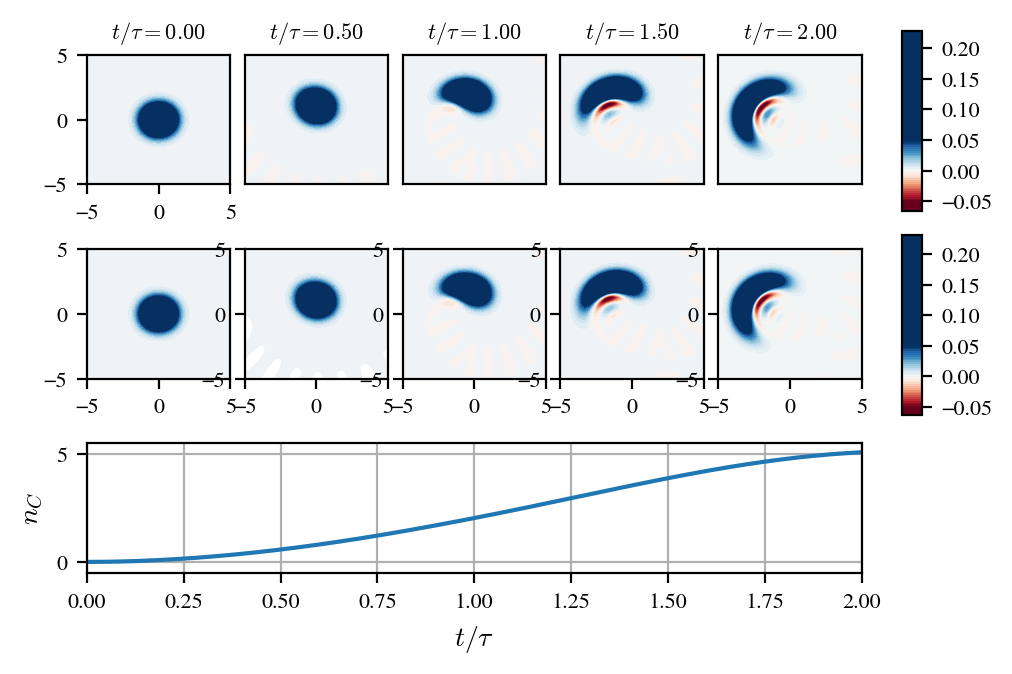

In [38]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def conv(x):
    return x.replace('+-', '-').encode()
mpl.rc('xtick',labelsize=8)
mpl.rc('ytick',labelsize=8)

xvec = np.linspace(-5,5,1000)
ID =6
fig_grid = (5, 5)
fig = plt.figure(dpi=200,figsize=(5,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=.1, hspace=0.5)
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,5):
#    row = int(i/5)
    col = i%6
#    print(row,col)
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
    array0 = np.loadtxt('./Data/Kerr/Cdens0004_cavity_drive/%04d.txt'%(i*2)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
    array = np.loadtxt('./Data/Kerr/Cdens%04d_cavity_drive/%04d.txt'%(ID,i*2)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Cdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    W = wigner(Qobj(array), xvec, xvec)
    W0 = wigner(Qobj(array0), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, col), colspan=1)
    ax2 = plt.subplot2grid(fig_grid, (1, col), colspan=1)
    if col>0:
        ax.set_yticks([])
        ax.set_xticks([])
    cont=ax.contourf(xvec, xvec, W0, 100, norm=mpl.colors.Normalize(-.05,.05), cmap=plt.get_cmap('RdBu'))
    cont2=ax2.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.05,.05), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t/\tau = %.2f$" % (i*2/4), fontsize=8)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat1 = np.genfromtxt((conv(x) for x in \
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%(ID))),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%10)),dtype=complex)
cax = fig.add_axes([0.94, 0.75, 0.02, 0.15])
cax2 = fig.add_axes([0.94, 0.58, 0.02, 0.15])

cbar = fig.colorbar(cont,cax=cax,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
cbar2 = fig.colorbar(cont2,cax=cax2,ticks=[-.1,-.05,0.,.05,.1,.15,.2,.25,.3])
#cbar = fig.colorbar(cont,ticks=[-.1,-.08,-.06,-.04,-.02,0.,.02,.04,.06,.08,.1])
tlist = dat1[:,0]
n_c = dat1[:,2]
#n_a = dat1[:,2]

ax = plt.subplot2grid(fig_grid, (2, 0), colspan=(fig_grid[1]))
ax.plot(tlist/0.4, n_c, label="Cavity")
#ax.plot(tlist, n_a, label="Atom excited state")
#ax.legend(loc="upper right",fontsize = 8)
ax.grid(True)
ax.set_xlim(0,.8/.4)
ax.set_ylim(-.5,5.5)
ax.set_xlabel('$t/\\tau$')
ax.set_ylabel('$n_C$');
plt.show()

In [45]:
print(expect(num(20),coherent_dm(20,3)))
#print(num(25))

8.998294013442164


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


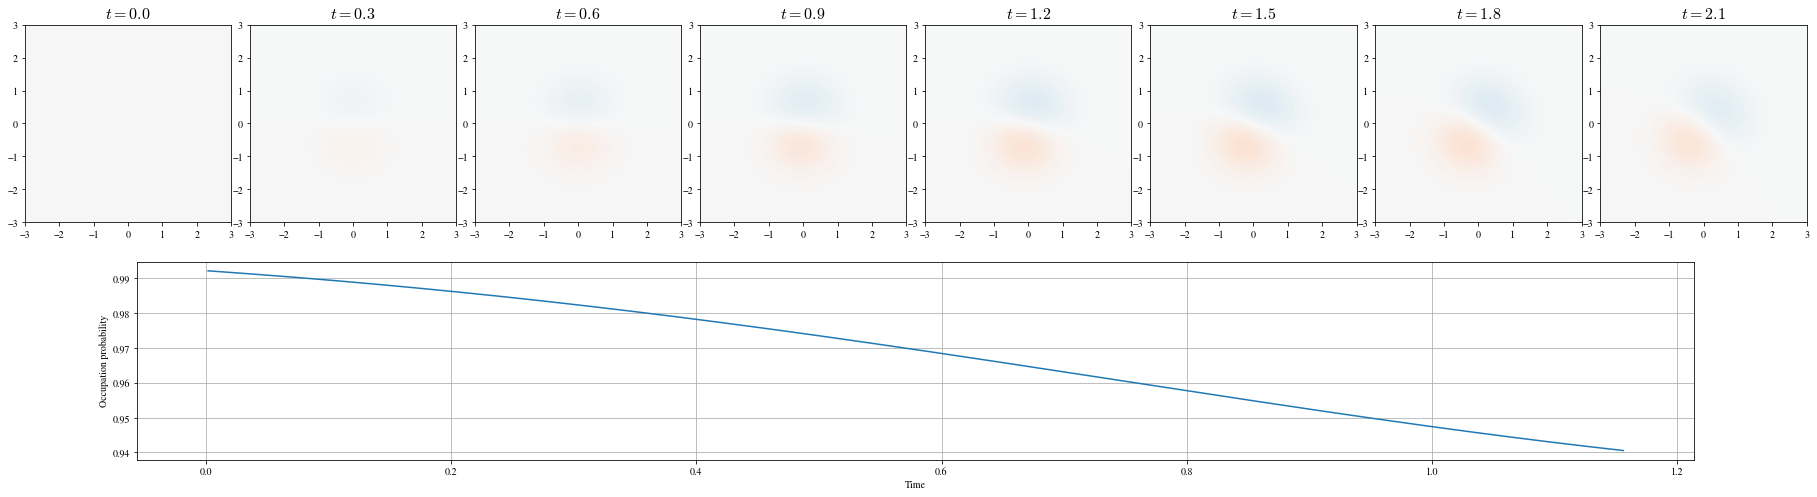

In [21]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

xvec = np.linspace(-3,3,200)
ID=3
fig_grid = (2, 20)
fig = plt.figure(figsize=(4*10,8))
#fig, axes = plt.subplots(6, 2, figsize=(10,30))
for i in range(0,8):
    row = int((i)/2)
    col = (i)%2
    #print('./Data/JC+fb/New/Bdens0000_%02d.txt'%i)
    array = np.loadtxt('./Data/Kerr/Bdens%04d_cavity_drive/%04d.txt'%(ID,i*3)).view(complex)
    array0 = np.loadtxt('./Data/Kerr/Bdens0001_cavity_drive/%04d.txt'%(i*3)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d_coherent_cavity/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens%04d_coherent_environment/%03d.txt'%(ID,i)).view(complex)
#    array = np.loadtxt('./Data/JC+fb/New/Bdens0010/%03d.txt'%(i)).view(complex)
    #print(array)
    correction = np.zeros((array.shape))
    correction = np.diagflat(np.diag(array))#1
    correct0 = np.diagflat(np.diag(array0))#1
    W0 = wigner(Qobj(array0-correct0), xvec, xvec)
    W = wigner(Qobj(array-correction), xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*i), colspan=2)
    ax.contourf(xvec, xvec, W-W0, 100, norm=mpl.colors.Normalize(-.05,.05), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % (i*3/10), fontsize=16)
#    cont = axes[row][col].contourf(xvec, xvec, W, 100,norm=mpl.colors.Normalize(-0.3,.3),cmap="RdBu")
#    lbl = axes[row][col].set_title("%d0 percent"%i)
dat1 = np.genfromtxt((conv(x) for x in \
                      open("./Data/Kerr/evol%04d_cavity_drive.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_cavity.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d_coherent_environment.txt"%ID)),dtype=complex)
#                      open("./Data/JC+fb/New/evol%04d.txt"%8)),dtype=complex)
#cbar = fig.colorbar(cont)
tlist = dat1[:,0]
n_B = dat1[:,3]

ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-6))
ax.plot(tlist[501:]-1, n_B[501:])
#ax.legend(loc="upper right")
ax.grid(True)
#ax.set_xlim(0,10)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability');

In [98]:
a = np.random.rand(4,4)
print(a)
print(np.diagflat(np.diag(a)))

[[0.94840267 0.06537226 0.16197961 0.67169227]
 [0.45545292 0.31398776 0.51013948 0.98344995]
 [0.9722046  0.55271127 0.69397346 0.86950247]
 [0.05212292 0.34310864 0.66936704 0.99334375]]
[[0.94840267 0.         0.         0.        ]
 [0.         0.31398776 0.         0.        ]
 [0.         0.         0.69397346 0.        ]
 [0.         0.         0.         0.99334375]]


In [11]:
N_env = 4
nBdiag = np.linspace(0,N_env,N_env+1).astype(np.int64)
nB = np.diag(nBdiag)
nB

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]])

In [3]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=10)
mpl.rc('ytick',labelsize=10)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

In [21]:
#% matplotlib inline
import numpy as np
from qutip import wigner,Qobj
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
import matplotlib.pyplot as plt
ID = 0
xvec = np.linspace(-3.,3.,200)
X,Y = np.meshgrid(xvec, xvec)
frn = 125
fps = 4
W = np.zeros((200,200,frn))

for i in range(1,frn+1):
    array = np.loadtxt('./Data/Kerr/Bdens%04d_cavity_drive/%03d.txt'%(ID,i)).view(complex)
    W[:,:,i-1] = wigner(Qobj(array), xvec, xvec)
#array = np.loadtxt('./Data/JC+fb/New/Bdens%04d/%02d.txt'%(ID,1)).view(complex)
#W= wigner(Qobj(array), xvec, xvec)

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], cmap="Spectral")

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, W[:,:,0], color='0.75',rstride=1, cstride=1, cmap="jet")]
ax.set_zlim(0,.3)
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("Wigner function")

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(W, plot), interval=1/fps)
fn = './Data/JC+fb/New/Bdens%04d/anim'%ID
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)
plt.rcParams['animation.html'] = 'html5'
ani

FileNotFoundError: [Errno 2] No such file or directory: './Data/Kerr/Bdens0000_cavity_drive/016.txt'